# Problem 1

#Combining handwritten digits 5 and 6 from the MNIST dataset (see chapter 3) with sound files "five" and "six" from the github link to the dataset. 

# Read Data

Read in sound files and randomlly split into testing and training data sets

In [1]:
# Get audio Data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile
import itertools
import os



five_sound_train = []
six_sound_train = []
five_sound_test = []
six_sound_test = []

rorder = np.random.permutation(50)
trainorder = rorder[:40]
testorder = rorder[40:]

for i in trainorder:
    rate, five  = scipy.io.wavfile.read("recordings/5_jackson_" + str(i) + ".wav",mmap=False)
    rate ,six = scipy.io.wavfile.read("recordings/6_jackson_" + str(i) + ".wav",mmap=False)
    five_sound_train.append(np.asarray(five))
    six_sound_train.append(np.asarray(six))
    
for i in testorder:
    rate, five  = scipy.io.wavfile.read("recordings/5_jackson_" + str(i) + ".wav",mmap=False)
    rate ,six = scipy.io.wavfile.read("recordings/6_jackson_" + str(i) + ".wav",mmap=False)
    five_sound_test.append(np.asarray(five))
    six_sound_test.append(np.asarray(six))    

Read in MNIST data and randomlly split into training and testing data sets

In [194]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X, y = mnist["data"], mnist["target"]

fives = X[(y==5)]
sixes = X[(y==6)]


rorder5 = np.random.permutation(fives.shape[0])
rorder6 = np.random.permutation(sixes.shape[0])

five_written_train = []
six_written_train = []
five_written_test=[]
six_written_test=[]
for i in range(40):
    five_written_train.append(np.asarray(fives[rorder5[i]]))
    six_written_train.append(np.asanyarray(sixes[rorder6[i]]))
for i in range(10):
    five_written_test.append(np.asarray(fives[rorder5[i+40]]))
    six_written_test.append(np.asanyarray(sixes[rorder6[i+40]]))



#  Visualize data

In [2]:
# Make all sound vectors the same size

max_len = np.max([np.max([len(a) for a in five_sound_train]),np.max([len(a) for a in six_sound_train]), \
                 np.max([len(a) for a in five_sound_test]), np.max([len(a) for a in six_sound_test])])
five_sound_train = np.asarray([np.pad(a,(0,max_len-len(a)),'constant',constant_values=0) for a in five_sound_train])
five_sound_test = np.asarray([np.pad(a,(0,max_len-len(a)),'constant',constant_values=0) for a in five_sound_test])
six_sound_train = np.asarray([np.pad(a,(0,max_len-len(a)),'constant',constant_values=0) for a in six_sound_train])
six_sound_test = np.asarray([np.pad(a,(0,max_len-len(a)),'constant',constant_values=0) for a in six_sound_test])

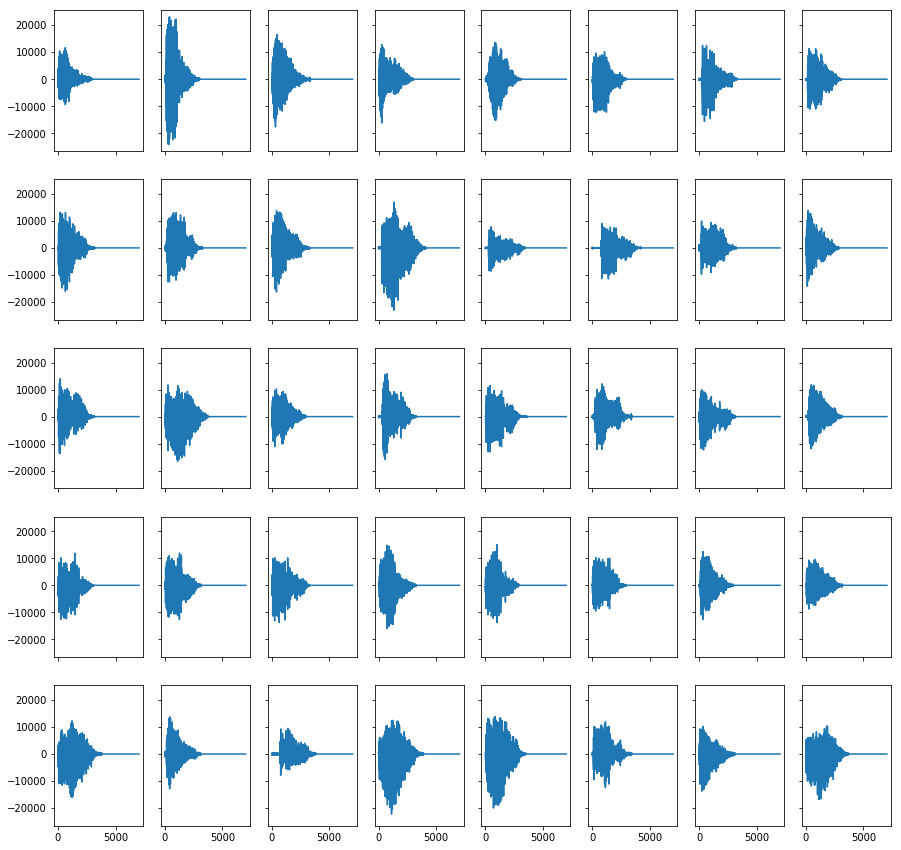

In [3]:
#Plot sound waves of fives in Training set
f, axs = plt.subplots(5,8,figsize=(15,15),sharex=True,sharey=True)
ii = -1
for i in range(8):
    for j in range(5):
        ii=ii+1
        axs[j,i].plot(five_sound_train[ii])
plt.show()

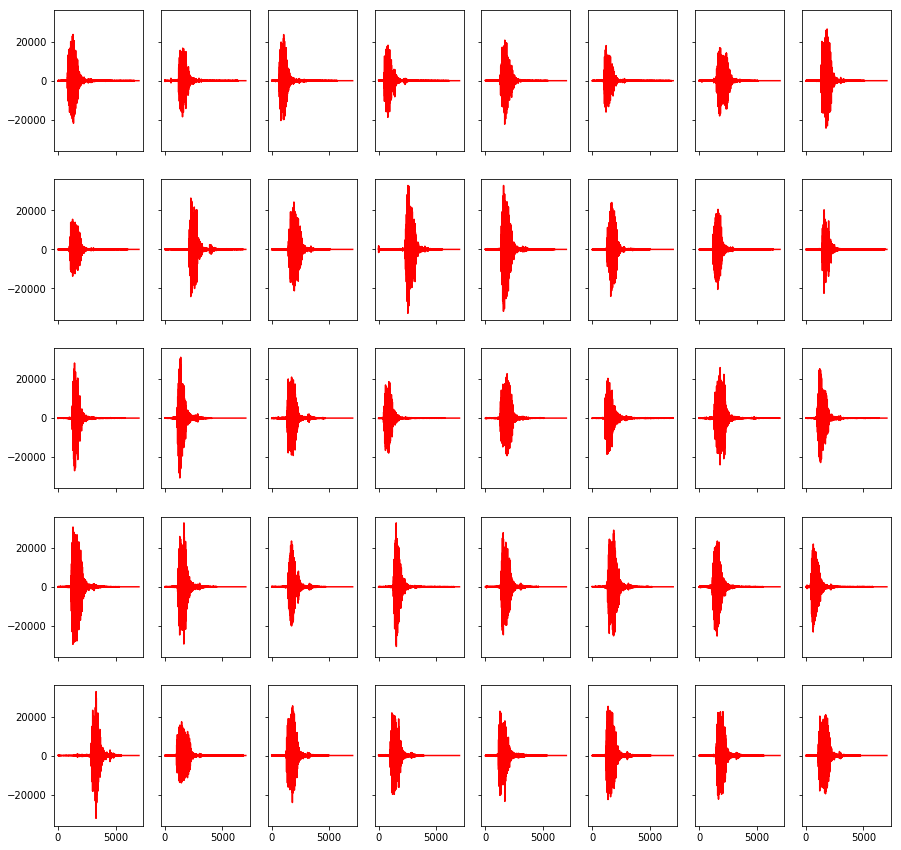

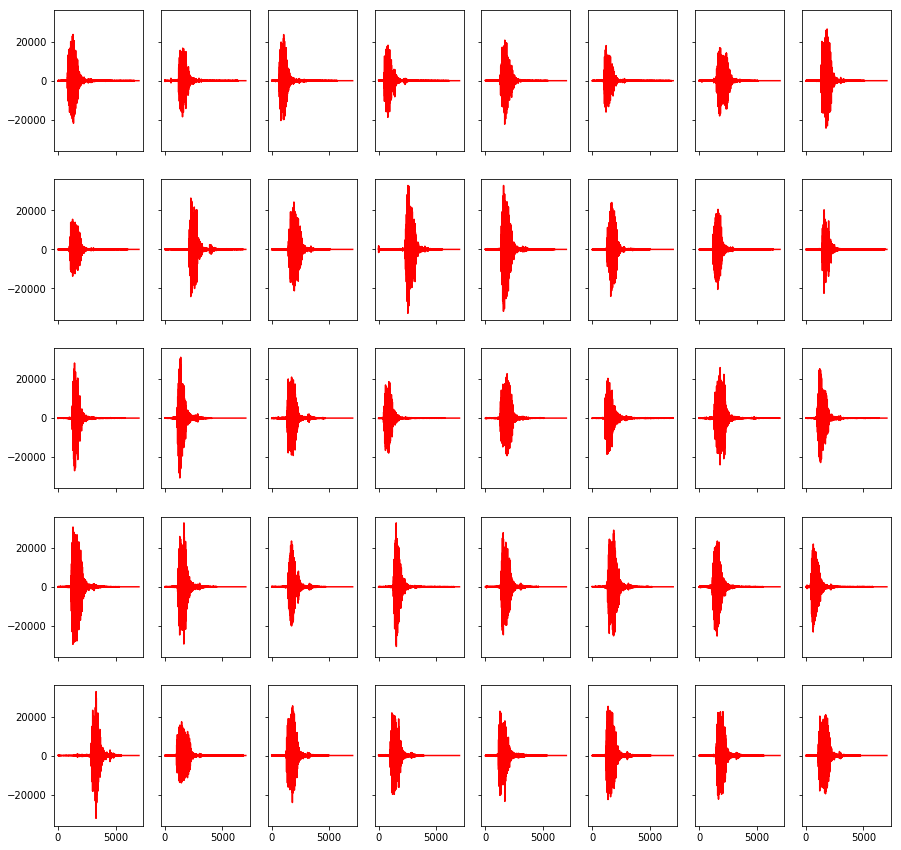

In [5]:
# Plot sound waves of sixes in training set
f, axs = plt.subplots(5,8,figsize=(15,15),sharex=True,sharey=True)
ii = -1
for i in range(8):
    for j in range(5):
        ii=ii+1
        axs[j,i].plot(six_sound_train[ii],color='red')
plt.show()

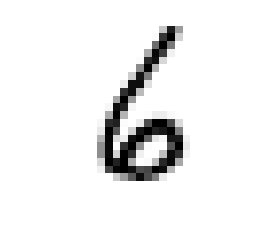

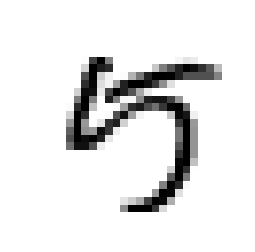

In [354]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

tmp = six_written_train[39]
tmp2 = tmp.reshape(28,28)
plt.imshow(tmp2, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

tmp = five_written_train[38]
tmp2 = tmp.reshape(28,28)
plt.imshow(tmp2, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

# Prepare data for K-NN

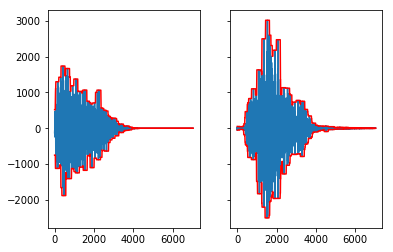

In [206]:
# Create envelope around average sound vector. To be used for distance calculation

five_avg = np.average(five_sound_train,axis=0)
six_avg = np.average(six_sound_train,axis=0)
f,ax = plt.subplots(1,2,sharey=True)
ax[0].plot(five_avg)
ax[1].plot(six_avg)

rolling_max_five=[]
rolling_max_six=[]
rolling_min_five=[]
rolling_min_six=[]
window=100
for i in range(max_len):
    rolling_max_five.append(np.max(five_avg[np.max([0,i-window]):np.min([i+window,max_len-1])]))
    rolling_max_six.append(np.max(six_avg[np.max([0,i-window]):np.min([i+window,max_len-1])]))
    rolling_min_five.append(np.min(five_avg[np.max([0,i-window]):np.min([i+window,max_len-1])]))
    rolling_min_six.append(np.min(six_avg[np.max([0,i-window]):np.min([i+window,max_len-1])]))
       
ax[0].plot(rolling_max_five,color='red')
ax[1].plot(rolling_max_six,color='red')    
ax[0].plot(rolling_min_five,color='red')
ax[1].plot(rolling_min_six,color='red') 

In [325]:
# Calculate envelope for every training case to be used for K-NN
train5max=[]
train5min=[]
for j in range(40):
    temp_max=[]
    temp_min=[]
    for i in range(max_len):
        temp_max.append(np.max(five_sound_train[j][np.max([0,i-window]):np.min([i+window,max_len-1])]))
        temp_min.append(np.min(five_sound_train[j][np.max([0,i-window]):np.min([i+window,max_len-1])]))
    temp_max=temp_max/np.linalg.norm(temp_max)
    temp_min=temp_min/np.linalg.norm(temp_min)
    
    train5max.append(temp_max)
    train5min.append(temp_min)
    
train6max=[]
train6min=[]
for j in range(40):
    temp_max=[]
    temp_min=[]
    for i in range(max_len):
        temp_max.append(np.max(six_sound_train[j][np.max([0,i-window]):np.min([i+window,max_len-1])]))
        temp_min.append(np.min(six_sound_train[j][np.max([0,i-window]):np.min([i+window,max_len-1])]))
    temp_max=temp_max/np.linalg.norm(temp_max)
    temp_min=temp_min/np.linalg.norm(temp_min)
    
    train6max.append(temp_max)
    train6min.append(temp_min)        

In [61]:
# Determine the number of singular values to use (Note: 3 sv give us the highest accuracy)
for sN in range(1,28):
    SixMat=np.zeros((28,28))
    FiveMat=np.zeros((28,28))
    for i in range(40):
        tmp2 = six_written_train[i].reshape(28,28)
        U,s,V = np.linalg.svd(tmp2, full_matrices=True)
        SixMat = SixMat + np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))     
        tmp2 = five_written_train[i].reshape(28,28)
        U,s,V = np.linalg.svd(tmp2, full_matrices=True)
        FiveMat = FiveMat + np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
 
    SixMat = SixMat/np.linalg.norm(SixMat)
    FiveMat = FiveMat/np.linalg.norm(FiveMat)
    c5 = 0
    for i in five_written_train:
        tmp2 = i.reshape(28,28)
        U,s,V = np.linalg.svd(tmp2, full_matrices=True)

        test = np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
        test = test/np.linalg.norm(test)
    
        if np.linalg.norm(FiveMat-test) < np.linalg.norm(SixMat-test):
            c5=c5+1            
    c6 = 0
    for i in six_written_train:
        tmp2 = i.reshape(28,28)
        U,s,V = np.linalg.svd(tmp2, full_matrices=True)

        test = np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
        test = test/np.linalg.norm(test)
    
        if np.linalg.norm(FiveMat-test) > np.linalg.norm(SixMat-test):
            c6=c6+1    
    print('[%Correct5,%Correct6, #ofComp] =', c5/40,c6/40,sN)        

[%Correct5,%Correct6, #ofComp] = 0.825 0.95 1
[%Correct5,%Correct6, #ofComp] = 0.875 0.975 2
[%Correct5,%Correct6, #ofComp] = 0.9 0.975 3
[%Correct5,%Correct6, #ofComp] = 0.875 0.975 4
[%Correct5,%Correct6, #ofComp] = 0.9 0.975 5
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 6
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 7
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 8
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 9
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 10
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 11
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 12
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 13
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 14
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 15
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 16
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 17
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 18
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 19
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 20
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 21
[%Correct5,%Correct6, #ofComp] = 0.9 0.95 22
[%Correct

In [327]:
# Prepare written numbers for K-NN algorithm
train5pairs=[]
for i in range(40):
    tmp2 = five_written_train[i].reshape(28,28)
    U,s,V = np.linalg.svd(tmp2, full_matrices=True)

    test = np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
    test = test/np.linalg.norm(test)
    
    train5pairs.append([train5max[i],train5min[i],test])
    
train6pairs=[]
for i in range(40):
    tmp2 = six_written_train[i].reshape(28,28)
    U,s,V = np.linalg.svd(tmp2, full_matrices=True)

    test = np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
    test = test/np.linalg.norm(test)
    
    train6pairs.append([train6max[i],train6min[i],test])
   
    

# Create K-NN algorithm
This function will compute the distance from an inputed test sample to all the training samples and return a positive (is 5) or a negative (is not 5) result for various threshold values. 

In [414]:
def K_Nearest_Classifier(train5pairs,train6pairs,testpairs,k):
    sN=3
    tmp2 = testpairs[1].reshape(28,28)
    U,s,V = np.linalg.svd(tmp2, full_matrices=True)

    loc1 = np.dot(U[:,:sN],np.dot(np.diag(s[:sN]),V[:sN,:]))  
    loc1 = loc1/np.linalg.norm(loc1)
    
    dist1 = []
    for i in range(40):
        dist1.append([np.linalg.norm(train5pairs[i][2]-loc1),5])
        
    for i in range(40):  
        dist1.append([np.linalg.norm(train6pairs[i][2]-loc1),6])
    
    loc2Max=[]
    loc2Min=[]
    for ii in range(max_len):
        loc2Max.append(np.max(testpairs[0][np.max([0,ii-window]):np.min([ii+window,max_len-1])]))
        loc2Min.append(np.min(testpairs[0][np.max([0,ii-window]):np.min([ii+window,max_len-1])]))
    loc2Max=loc2Max/np.linalg.norm(loc2Max)
    loc2Min=loc2Min/np.linalg.norm(loc2Min)   
    
    dist1 = np.asarray(dist1)
    counter=-1
    for i in range(40):
        counter= counter+1
        dist1[counter,0] = dist1[counter,0]+ (sum((loc2Max-train5pairs[i][0])**2) + sum((loc2Min-train5pairs[i][1])**2))/2
        
    for i in range(40):
        counter= counter+1
        dist1[counter,0] = dist1[counter,0]+ (sum((loc2Max-train6pairs[i][0])**2) + sum((loc2Min-train6pairs[i][1])**2))/2
    
    dist1=dist1[np.argsort(dist1[:,0])]
    outcome=[]
    thresval = [-.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.1]
    for thres in thresval:
        if sum(dist1[:k,1]==5)/k >= thres:
            outcome.append(1)
        else:
            outcome.append(0)
    if sum(dist1[:k,1]==5) >= sum(dist1[:k,1]==6):
        return 5, dist1, outcome
    else:
        return 6, dist1, outcome

# Call Function and plot ROC curve

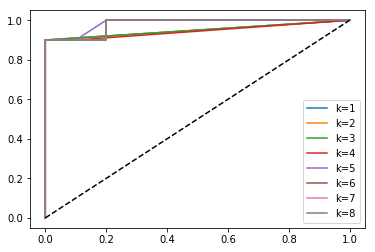

In [468]:
#Call classifier for different values of K
Nn = [1,2,3,4,5,6,7,8]
y=[]
x=[]
for k in Nn:
    outcome5=[]
    outcome6=[]
    for j in range(10):
        testpairs=[]
        testpairs.append(five_sound_test[j])
        testpairs.append(five_written_test[j])
        look,data,outcome = K_Nearest_Classifier(train5pairs,train6pairs,testpairs,k)
        outcome5.append(outcome)
        
    for j in range(10):
        testpairs=[]
        testpairs.append(six_sound_test[j])
        testpairs.append(six_written_test[j])
        look,data,outcome = K_Nearest_Classifier(train5pairs,train6pairs,testpairs,k)
        outcome6.append(outcome)

    y.append(sum(np.asarray(outcome5)==1)/10)
    x.append(1-sum(np.asarray(outcome6)==0)/10)
    plt.plot(x[k-1],y[k-1],label=str('k='+str(k)))
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()        


# Compute Area Under Curve

In [469]:
# Area Under the Curve
from scipy.integrate import simps
for i in range(8):
    print(i+1,simps(y[i]))


1 8.73333333333
2 8.73333333333
3 8.73333333333
4 8.73333333333
5 8.93333333333
6 8.86666666667
7 8.86666666667
8 8.86666666667


# What would be your choice of k value?

From the AUC values above and the ROC plot, I would select K=5 in my K-NN classifier.  
